<a href="https://colab.research.google.com/github/eirikngard/Eika/blob/master/N%C3%A6ring.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from google.colab import files
uploaded = files.upload()

Saving LE29Q03_201120.XLSX to LE29Q03_201120.XLSX


In [76]:
header = ['Kundenr','Orgnr','Postnr','Kode','Produkt','Forsikringsnr','Årspremie','NACE']
data = pd.read_excel('LE29Q03_201120.XLSX',names=header,skiprows=1)#, header=None,skiprows=1,names=navn)

In [3]:
colo = ['#84BD00','#60c3e6','#6e6259',
        '#61a100','#3396b9','#928073',
        '#509200','#2588ab','#b1a297',
        '#408500','#197c9f','#c5beb9','#ac333b']

In [87]:
n = ['N05','N06','N07','N10','N15','N16','N17','N18','N20','N22','N25','N31','N33','N35','N40','N53','N55','N56','N57','N70','N80','N85','N95','N97','N98']

nlist = []
for i, nn in enumerate(n):
  dat = data.loc[data['Kode']==nn]
  nlist.append(dat)
res = pd.concat(nlist).drop_duplicates().reset_index(drop=True)

In [ ]:
res

In [95]:
print('Total årspremie næring 2020: ', res['Årspremie'].sum(),' kr')

Total årspremie næring 2020:  555457714  kr


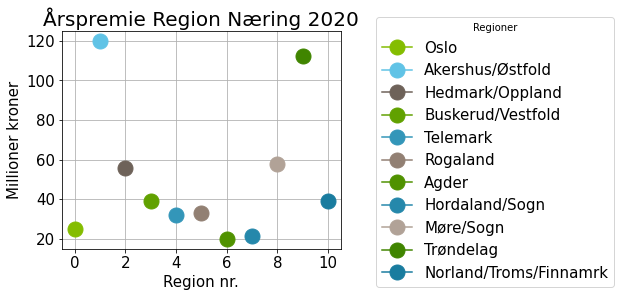

In [88]:

'''
Fylker
'''
#postnr oversikt hentet fra https://no.wikipedia.org/wiki/Norges_postnumre

a=res.loc[(res['Postnr'] >= '0000')&(res['Postnr'] <= '1299')]#Oslo
b=res.loc[(res['Postnr'] >= '1300')&(res['Postnr'] <= '2149')]
c=res.loc[(res['Postnr'] >= '2150')&(res['Postnr'] <= '2999')]
d=res.loc[(res['Postnr'] >= '3000')&(res['Postnr'] <= '3649')]
e=res.loc[(res['Postnr'] >= '3650')&(res['Postnr'] <= '3999')]
f=res.loc[(res['Postnr'] >= '4000')&(res['Postnr'] <= '4449')]
g=res.loc[(res['Postnr'] >= '4450')&(res['Postnr'] <= '4999')]
h=res.loc[(res['Postnr'] >= '5000')&(res['Postnr'] <= '5999')]
i=res.loc[(res['Postnr'] >= '6000')&(res['Postnr'] <= '6999')]
j=res.loc[(res['Postnr'] >= '7000')&(res['Postnr'] <= '7949')]
k=res.loc[(res['Postnr'] >= '7950')&(res['Postnr'] <= '9999')]

#daa = [aa,bb,cc,dd,ee,ff,gg,hh,ii,jj]
da = [a,b,c,d,e,f,g,h,i,j,k]; 
tit = ['Oslo','Akershus/Østfold','Hedmark/Oppland','Buskerud/Vestfold','Telemark','Rogaland',
       'Agder','Hordaland/Sogn','Møre/Sogn','Trøndelag','Norland/Troms/Finnamrk']
fig,ax = plt.subplots(figsize=(5,4))
for count,vari in enumerate(da):
  ax.plot(count,vari['Årspremie'].sum()/(10**6),marker='o',color=colo[count],markersize=15,label=tit[count])
  ax.legend(bbox_to_anchor=(1.10, 1.10),prop={'size': 15},title='Regioner')
  ax.set_ylabel('Millioner kroner',fontsize=15); ax.set_xlabel('Region nr.',fontsize=15)
  ax.tick_params(axis = 'both', which = 'major', labelsize = 15)
  #ax.set_ylim(0,30); ax.set_xlim(-0.5,10)
  ax.set_title('L21 2020')
ax.set_title('Årspremie Region Næring 2020',size=20)
ax.grid()

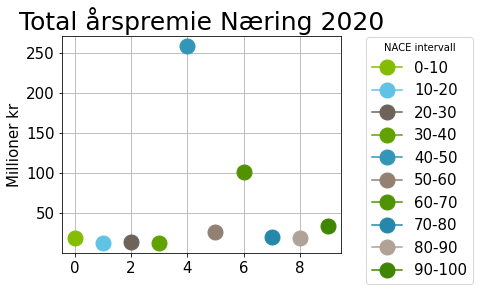

In [37]:

#kategoriene delt inn in 10 og 10 hele tall, NÅ ALLE L

a=res.loc[(res['NACE'] >= '01.000')&(res['NACE'] <= '09.999')]
b=res.loc[(res['NACE'] >= '10.000')&(res['NACE'] <= '19.999')]
c=res.loc[(res['NACE'] >= '20.000')&(res['NACE'] <= '29.999')]
d=res.loc[(res['NACE'] >= '30.000')&(res['NACE'] <= '39.999')]
e=res.loc[(res['NACE'] >= '40.000')&(res['NACE'] <= '49.999')]
f=res.loc[(res['NACE'] >= '50.000')&(res['NACE'] <= '59.999')]
g=res.loc[(res['NACE'] >= '60.000')&(res['NACE'] <= '69.999')]
h=res.loc[(res['NACE'] >= '70.000')&(res['NACE'] <= '79.999')]
i=res.loc[(res['NACE'] >= '80.000')&(res['NACE'] <= '89.999')]
j=res.loc[(res['NACE'] >= '90.000')&(res['NACE'] <= '99.999')]

da = [a,b,c,d,e,f,g,h,i,j]; #farger = [grønn,blå,grå,sjøgrønn]
tit = ['0-10','10-20','20-30','30-40','40-50','50-60','60-70','70-80','80-90','90-100']
fig,ax = plt.subplots(figsize=(5,4))
for count,vari in enumerate(da):
  ax.plot(count,vari['Årspremie'].sum()/(10**6),marker='o',color=colo[count],markersize=15,label=tit[count])
  ax.legend(bbox_to_anchor=(1.50, 1.03),prop={'size': 15},title="NACE intervall")
  ax.set_ylabel('Millioner kr',fontsize=15)
  ax.tick_params(axis = 'both', which = 'major', labelsize = 15)
  #ax.set_ylim(-1,35); ax.set_xlim(-0.5,10)
  ax.set_title('L21 2020')
ax.set_title('Total årspremie Næring 2020',size=25)
ax.grid()

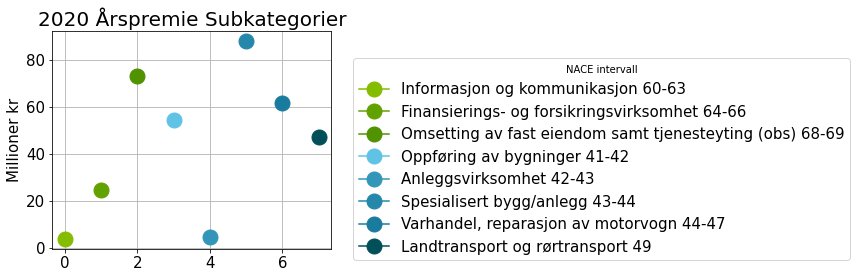

In [84]:
fig, ax = plt.subplots(figsize=(5,4))
'''
De største hovedkategoriene
'''

a=res.loc[(res['NACE'] >= '60.000')&(res['NACE'] <= '63.999')]
b=res.loc[(res['NACE'] >= '64.000')&(res['NACE'] <= '66.999')]
c=res.loc[(res['NACE'] >= '67.000')&(res['NACE'] <= '69.999')]
d=res.loc[(res['NACE'] >= '41.000')&(res['NACE'] <= '41.999')]
e=res.loc[(res['NACE'] >= '42.000')&(res['NACE'] <= '42.999')]
f=res.loc[(res['NACE'] >= '43.000')&(res['NACE'] <= '43.999')]
g=res.loc[(res['NACE'] >= '44.000')&(res['NACE'] <= '47.999')]
h=res.loc[(res['NACE'] >= '48.000')&(res['NACE'] <= '49.999')]

da = [a,b,c,d,e,f,g,h]; #farger = [grønn,blå,grå,sjøgrønn]
farger = [colo[0],colo[3],colo[6],colo[1],colo[4],colo[7],colo[10],'#004f59']
tit = ['Informasjon og kommunikasjon 60-63','Finansierings- og forsikringsvirksomhet 64-66',
       'Omsetting av fast eiendom samt tjenesteyting (obs) 68-69',
       'Oppføring av bygninger 41-42','Anleggsvirksomhet 42-43',
       'Spesialisert bygg/anlegg 43-44','Varhandel, reparasjon av motorvogn 44-47',
       'Landtransport og rørtransport 49']
#fig,ax = plt.subplots(figsize=(5,4))
for i,j in enumerate(da):
  ax.plot(i,j['Årspremie'].sum()/(10**6),marker='o',color=farger[i],markersize=15,label=tit[i])
  ax.legend(bbox_to_anchor=(1.05, 0.91),prop={'size': 15},title='NACE intervall')
  ax.set_ylabel('Millioner kr',fontsize=15)
  ax.tick_params(axis = 'both', which = 'major', labelsize = 15)
  #ax.set_ylim(0,30); ax.set_xlim(-0.5,4)
ax.set_title('2020 Årspremie Subkategorier',size = 20)
ax.grid()

In [75]:
res['NACE'].value_counts().nlargest(10)

41.200    3741
68.209    2884
0 .       2649
43.120    2356
49.410    1959
93.120    1178
43.990    1096
43.221    1087
45.200     957
43.210     889
Name: NACE, dtype: int64

In [69]:
res.nlargest(20, ['Årspremie'])
#64.190 - Bankvirksomhet ellers
#64.201 - Finansielle holdingselskaper 

,Kundenr,Orgnr,Postnr,Kode,Produkt,Forsikringsnr,Årspremie,NACE
10185,896959,979319568,0201,N17,PERSONAL,4935415,4215564,64.201
13980,896959,979319568,0201,N20,YRKESSKADE,4940267,1513929,64.201
12897,707463,987975105,1950,N20,YRKESSKADE,6191037,887994,43.990
10211,976133,915691161,4391,N17,PERSONAL,5275679,702291,64.190
12910,708767,937052766,0129,N20,YRKESSKADE,4066081,620210,41.101
10145,729406,937885822,1941,N17,PERSONAL,4163963,557063,64.190
10095,267642,837897912,6893,N17,PERSONAL,6231437,509960,64.190
24863,1190559,948437864,7439,N25,HUSEIER,6150949,491723,68.201
10054,105502,937884494,1851,N17,PERSONAL,5766182,394821,64.190
43249,547699,974241420,3217,N80,KOLL.ULYKKE,6180291,387500,94.991


In [110]:
res.nlargest(3, ['Årspremie'])

,Kundenr,Orgnr,Postnr,Kode,Produkt,Forsikringsnr,Årspremie,NACE
10185,896959,979319568,0201,N17,PERSONAL,4935415,4215564,64.201
13980,896959,979319568,0201,N20,YRKESSKADE,4940267,1513929,64.201
12897,707463,987975105,1950,N20,YRKESSKADE,6191037,887994,43.990


In [ ]:
#prøver å kaetgorisere produkt etter årspremie. problemet ser ut til å være 
#at produkt er dtype object, og nlargest tar ikke objet som argument.
res.groupby('Årspremie', group_keys=False).apply(lambda x: x.nlargest(5, "Produkt".astype('float')))

In [ ]:
df_out = res.groupby(['Produkt', 'Årspremie']).max().unstack()

In [ ]:
res['Produkt'].astype(int)